In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, fbeta_score
import pickle

%matplotlib inline



In [ ]:
# loading and reading data
data = pd.read_csv("census.csv")
data.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [ ]:
# dataset don't have any missing data but have skewed data
data.skew(axis=0)

age                0.532816
education-num     -0.310621
capital-gain      11.789002
capital-loss       4.516304
hours-per-week     0.340545
dtype: float64

In [ ]:
# function to plot feature distribution of skewed data
def distribution(data, transformed=False):
  fig = plt.figure(figsize=(12, 6))

  for i, feature in enumerate(['capital-gain','capital-loss']):
    ax = fig.add_subplot(1, 2, i+1)
    ax.hist(data[feature], bins=25, color='c', )
    ax.set_title(f"'{feature}', Feature Distribution")
    ax.set_xlabel("Value")
    ax.set_ylabel("Number of records")
    ax.set_ylim((0, 2000))
    ax.set_yticks([0, 500, 1000, 1500, 2000])
    ax.set_yticklabels([0, 500, 1000, 1500, ">2000"])
  
  fig.tight_layout()
  fig.show()

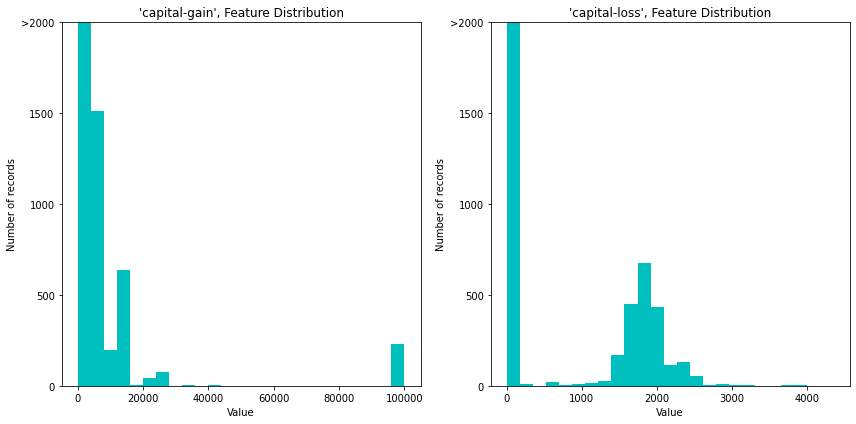

In [ ]:
distribution(data)

In [ ]:
# dividing data into features and labels
y = data['income']
X = data.drop('income', axis=1)

In [ ]:
# apply logarithmic transformation on skewed data
skewed = ['capital-gain', 'capital-loss']
X[skewed] = X[skewed].apply(lambda x: np.log(x+1))

In [ ]:
y.dtype

dtype('O')

In [ ]:
X.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,7.684784,0.0,40.0,United-States
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,13.0,United-States
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,40.0,United-States
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,40.0,United-States
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,40.0,Cuba


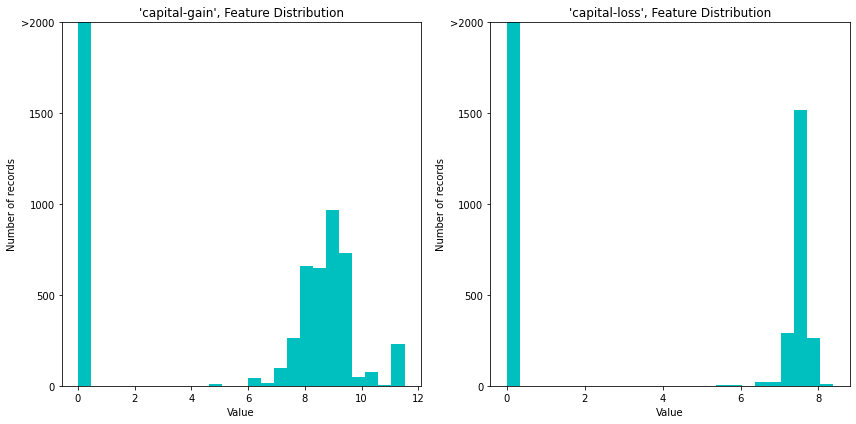

In [ ]:
distribution(X)

In [ ]:
# normalize data (some columns have larger range than other) using minmax scaler

# initialize scaler
scaler = MinMaxScaler()

# storing numerical cols to list
numerical_col = [col for col in X.columns if X[col].dtype != 'object']

# fit and transform numerical data
X[numerical_col] = scaler.fit_transform(X[numerical_col])


In [ ]:
X.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


In [ ]:
# convert categorical columns to numerical
print(f"{len(X.columns)} columns before encoding")

# one hot encoding
X = pd.get_dummies(X)

print(f"{len(X.columns)} columns after encoding")

13 columns before encoding
103 columns after encoding


In [ ]:
y.unique()

array(['<=50K', '>50K'], dtype=object)

In [ ]:
# label also has categorical columns, encoding '<=50K' as 0 and '>50k' as 1
y = y.replace({'<=50K': 0, '>50K' : 1})

In [ ]:
y.dtype

dtype('int64')

In [ ]:
# split data into training data and validation data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.2, random_state=42)


print(f"{X_train.shape[0]} rows in X_train\n"
      f"{X_val.shape[0]} rows in X_val\n"
      f"{X_test.shape[0]} rows in X_test")

27133 rows in X_train
14471 rows in X_val
3618 rows in X_test


In [ ]:
# function to train model, predict and calculating score
def train_predict(model, X_train, y_train, X_val, y_val):
  results = {}
  model.fit(X_train, y_train) # fit training data to model
  pred = model.predict(X_val) # prediction using validation data
  results['a_score'] = accuracy_score(y_val, pred)
  results['f_beta_score'] = fbeta_score(y_val, pred, beta=1)

  return results

In [ ]:
# initializing each model that we have imported
randomforest = RandomForestClassifier(random_state=42)
adaboost = AdaBoostClassifier()
bagging = BaggingClassifier()
gradientboosting = GradientBoostingClassifier()
knn = KNeighborsClassifier()
naivebayes = GaussianNB()
tree = DecisionTreeClassifier()
svm = SVC()
logistic = LogisticRegression()


In [ ]:
# get name of the model and their accuracy score and fbeta score to find most suitable model
classifiers = [randomforest, adaboost, bagging, gradientboosting, knn, naivebayes, tree, svm, logistic]
results = {}
for clf in classifiers:
  clf_name = clf.__class__.__name__
  results[clf_name] = train_predict(clf, X_train, y_train, X_val, y_val)
print(results)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'AdaBoostClassifier': {'a_score': 0.8566058595909343,
  'f_beta_score': 0.6780838917845619},
 'BaggingClassifier': {'a_score': 0.835820895522388,
  'f_beta_score': 0.6449916327994262},
 'DecisionTreeClassifier': {'a_score': 0.8100608070757325,
  'f_beta_score': 0.6095454545454545},
 'GaussianNB': {'a_score': 0.5945826423438364,
  'f_beta_score': 0.531134126070835},
 'GradientBoostingClassifier': {'a_score': 0.8626865671641791,
  'f_beta_score': 0.6874685455460493},
 'KNeighborsClassifier': {'a_score': 0.8247650635710337,
  'f_beta_score': 0.6267953849776313},
 'LogisticRegression': {'a_score': 0.8407960199004975,
  'f_beta_score': 0.6486090775988288},
 'RandomForestClassifier': {'a_score': 0.8407960199004975,
  'f_beta_score': 0.6592522479886418},
 'SVC': {'a_score': 0.8386954118297402, 'f_beta_score': 0.6367936270848893}}

In [ ]:
# best model is GradientBoostingClassifier
# improve the model

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, fbeta_score
from sklearn.ensemble import GradientBoostingClassifier


def grid_fit_predict(model, parameters):           
  scorer = make_scorer(fbeta_score, beta=0.5)

  grid_obj = GridSearchCV(model,parameters, scoring=scorer)

  grid_fit = grid_obj.fit(X_train, y_train)

  best_clf = grid_fit.best_estimator_
  return best_clf





In [ ]:
model = GradientBoostingClassifier()

parameters = {'learning_rate':[0.1,0.2],
              'n_estimators':[100,150],
              'max_depth':[2,3],
              'min_samples_leaf':[1, 2],
              'min_samples_split':[2, 3]}


best_clf = grid_fit_predict(model, parameters)
print(best_clf)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [113]:

train_pred = best_clf.predict(X_train)
val_pred = best_clf.predict(X_val)
test_pred = best_clf.predict(X_test)

print(f"train : {accuracy_score(y_train, train_pred)}")
print(f"val : {accuracy_score(y_val, val_pred)}\n"
      f"test : {accuracy_score(y_test, test_pred)}")


train : 0.8774923524859027
val : 0.8672517448690484
test : 0.8742399115533444


Text(0.5, 1.0, 'accuracy score for training, validation and testing data')

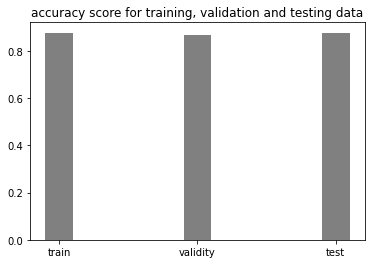

In [115]:

plt.bar(['train', 'validity', 'test'], [ accuracy_score(y_train, train_pred), accuracy_score(y_val, val_pred2), accuracy_score(y_test, test_pred3)], width=0.2, color='grey')
plt.title("accuracy score for training, validation and testing data")
